In [1]:
from thingsmri.dataset import ThingsmriLoader
import matplotlib.pyplot as plt

# Working with ROIs

Often times, you might want to limit your analyses to specific regions of interest in the brain, either to study different anatomical locations separately from one another, or to simply save computational resources.

The THINGS-fMRI dataset comes with plenty localized ROIs. These ROIs include functionally defined regions that respond selectively to specific object categories (e.g. fusiform face area, extrastriate body part area, etc.). They also include retinotopically defined regions of interest like V1, V2, hV4, etc. Finally, the data also comes with estimated labels from the comprehensive [Glasser parcellation atlas]().

# Load the data

All this information is part of the `VoxelMetadata` which you can [download alongside the single trial fMRI responses from figshare](https://plus.figshare.com/articles/dataset/THINGS-data_fMRI_Single_Trial_Responses_table_format_/20492835/1). Let's have a look!

In [2]:
# assume this is where you've downloaded the data
!ls /Users/olivercontier/bigfri/openneuro/THINGS-data/THINGS-fMRI/derivatives/betas_csv

sub-01_ResponseData.h5      sub-02_VoxelMetadata.csv
sub-01_StimulusMetadata.csv sub-03_ResponseData.h5
sub-01_VoxelMetadata.csv    sub-03_StimulusMetadata.csv
sub-02_ResponseData.h5      sub-03_VoxelMetadata.csv
sub-02_StimulusMetadata.csv


In [3]:
# We'll use the data loader that comes with the python module contained in this github repo, but you may also simply load the csv files on your own as needed.
dl = ThingsmriLoader(
    thingsmri_dir='/Users/olivercontier/bigfri/openneuro/THINGS-data/THINGS-fMRI/derivatives'
)

# we're gonna chose the first subject
sub = '01'

# and load the data
responses, stimdata, voxdata = dl.load_responses(sub)

Let's have a look at the `VoxelMetadata`. As you can see, there is a lot of information included here, like noise ceiling estimates (`nc_singletrial` and `nc_testset`) or pRF parameter estimates (`prf-polarangle` or `prf-eccentricity`). But, we also have a lot of ROis encoded:

In [4]:
# each row corresponds to a voxel
# each column to a metainfo paramter
voxdata

,voxel_id,subject_id,voxel_x,voxel_y,voxel_z,nc_singletrial,nc_testset,splithalf_uncorrected,splithalf_corrected,prf-eccentricity,...,glasser-p47r,glasser-TGv,glasser-MBelt,glasser-LBelt,glasser-A4,glasser-STSva,glasser-TE1m,glasser-PI,glasser-a32pr,glasser-p24
0,0,1,1,39,33,0.000000,0.000000,-0.030530,-0.062982,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,39,34,1.102513,11.799193,0.070108,0.131029,4.941197,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,39,35,2.134454,20.743164,0.121099,0.216036,11.064742,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,39,36,0.000000,0.000000,-0.040901,-0.085290,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1,40,33,0.446367,5.105714,0.034924,0.067491,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211334,211334,1,71,41,35,1.868743,18.601217,0.102979,0.186729,0.000000,...,0,0,0,0,0,0,0,0,0,0
211335,211335,1,71,41,36,1.895905,18.824928,0.108675,0.196044,0.000000,...,0,0,0,0,0,0,0,0,0,0
211336,211336,1,71,42,33,1.529414,15.709986,0.093337,0.170737,0.000000,...,0,0,0,0,0,0,0,0,0,0
211337,211337,1,71,42,34,0.000000,0.000000,0.000653,0.001306,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(*voxdata.columns, sep='\n')

voxel_id
subject_id
voxel_x
voxel_y
voxel_z
nc_singletrial
nc_testset
splithalf_uncorrected
splithalf_corrected
prf-eccentricity
prf-polarangle
prf-rsquared
prf-size
V1
V2
V3
hV4
VO1
VO2
LO1 (prf)
LO2 (prf)
TO1
TO2
V3b
V3a
lEBA
rEBA
lFFA
rFFA
lOFA
rOFA
lSTS
rSTS
lPPA
rPPA
lRSC
rRSC
lTOS
rTOS
lLOC
rLOC
IT
glasser-V1
glasser-MST
glasser-V6
glasser-V2
glasser-V3
glasser-V4
glasser-V8
glasser-4
glasser-3b
glasser-FEF
glasser-PEF
glasser-55b
glasser-V3A
glasser-RSC
glasser-POS2
glasser-V7
glasser-IPS1
glasser-FFC
glasser-V3B
glasser-LO1
glasser-LO2
glasser-PIT
glasser-MT
glasser-A1
glasser-PSL
glasser-SFL
glasser-PCV
glasser-STV
glasser-7Pm
glasser-7m
glasser-POS1
glasser-23d
glasser-v23ab
glasser-d23ab
glasser-31pv
glasser-5m
glasser-5mv
glasser-23c
glasser-5L
glasser-24dd
glasser-24dv
glasser-7AL
glasser-SCEF
glasser-6ma
glasser-7Am
glasser-7Pl
glasser-7PC
glasser-LIPv
glasser-VIP
glasser-MIP
glasser-1
glasser-2
glasser-3a
glasser-6d
glasser-6mp
glasser-6v
glasser-p24pr
glasser-33pr
glass

# Extract data from an ROI

In [6]:
# Say we are interested in V1
ROI_select = 'V1'

# We simply define a mask of all voxels that match this ROI
roimask = voxdata[ROI_select].values.astype(bool)

# and apply it to the response data
roidata = responses[roimask]

# The result will be a data frame where each row contains a voxel in the target ROI
roidata

,0,1,2,3,4,5,6,7,8,9,...,9830,9831,9832,9833,9834,9835,9836,9837,9838,9839
51988,0.026562,-0.049540,0.007536,0.088923,0.083458,0.053837,0.054632,-0.063822,-0.086457,-0.008973,...,0.045944,0.097041,0.161962,-0.087920,-0.118856,-0.001877,0.070185,0.125432,-0.148012,0.044395
51989,0.033039,-0.039980,0.100429,0.113288,-0.012920,-0.043994,0.059633,0.148102,0.046083,0.010939,...,0.063707,0.027341,-0.053850,-0.075949,-0.052494,0.052200,0.134651,0.037157,-0.109821,0.043721
51990,-0.016971,-0.049711,0.086029,0.080600,0.078725,-0.009777,0.032735,0.044130,0.037209,0.057340,...,0.017229,0.020332,0.007574,-0.076693,-0.045677,0.063722,0.066641,0.003241,-0.102434,0.024223
52007,0.033396,-0.049491,0.065336,0.079782,0.055479,0.033464,0.006465,-0.122836,-0.121617,0.070363,...,0.011709,0.075514,0.141281,-0.064228,-0.092510,0.025433,0.096883,0.110800,-0.078948,0.001380
52008,0.046907,-0.054301,0.035067,0.064127,0.082143,0.090982,0.064123,-0.073732,-0.076721,0.033461,...,0.099456,0.012575,0.159675,-0.095103,-0.125353,-0.004514,0.067220,0.160334,-0.128805,0.144007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147727,0.022927,-0.012776,-0.007038,0.023964,-0.006151,-0.045723,0.058763,0.105938,0.029381,0.018618,...,0.062590,-0.022254,0.002183,0.025566,0.004004,-0.006583,0.052958,0.010302,0.000162,0.058832
147754,-0.003918,-0.006112,0.009420,-0.046792,-0.054597,-0.093279,-0.019024,0.058531,-0.068476,0.059227,...,0.111657,0.011454,0.072643,-0.031087,0.067009,0.089734,0.160376,-0.035397,-0.018328,0.150588
147755,0.022813,0.029051,0.025536,0.051884,-0.058625,-0.027493,-0.022455,0.034967,0.060328,0.036903,...,0.126079,-0.016313,0.022550,0.040699,-0.034033,0.097062,0.097257,-0.021677,-0.097895,0.009925
151756,0.059138,0.011817,0.074733,0.162330,-0.029702,-0.073724,-0.122416,0.059258,0.026556,-0.005360,...,0.059787,0.050084,-0.035170,0.026247,0.025849,-0.068961,0.000714,-0.008297,-0.106958,0.010770


Text(0, 0.5, 'mean V1 amplitude')

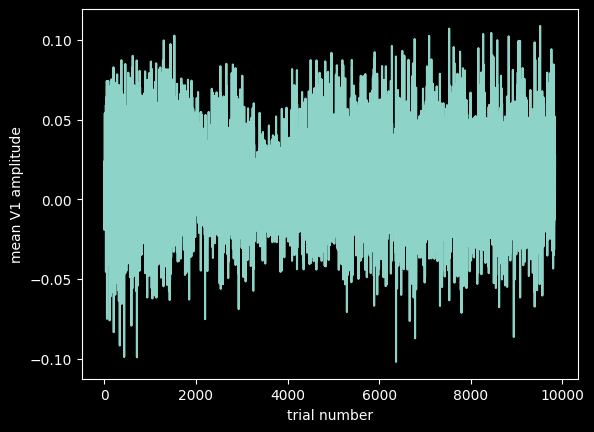

In [7]:
# let's inspect the mean V1 response over images
plt.plot(range(roidata.shape[1]), roidata.mean(axis=0).to_numpy())
plt.xlabel('trial number');plt.ylabel('mean V1 amplitude')

# Select multiple ROIs at once

In [8]:
# Let's say, you want to extract data from IT, which should include the following glasser labels
IT_rois = [
    'glasser-TE1p','glasser-TE2p', 'glasser-FFC', 'glasser-VVC', 'glasser-VMV2', 
    'glasser-VMV3', 'glasser-PHA1', 'glasser-PHA2', 'glasser-PHA3'
    ]

# we simply select all columns in the voxel metadata
# and sum over them to create a boolean mask that reflects their union
roimask = voxdata[IT_rois].sum(axis=1).values.astype(bool)

# again, we can apply this mask to the response data to get the activation of IT voxels to each image
roidata = responses[roimask]

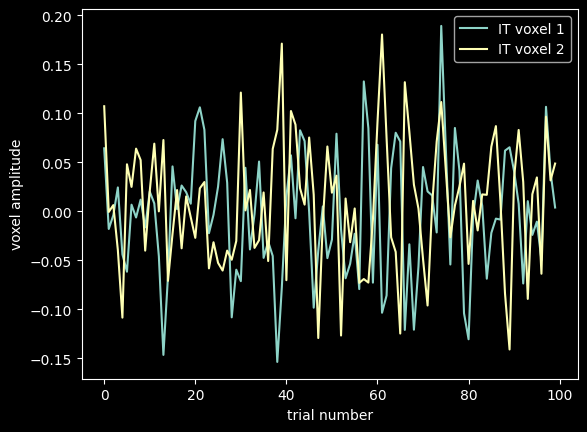

In [10]:
# Finally, let's have a look at the data from two randomly selected voxels in this IT mask
# for the first 100 images
plt.plot(range(100), roidata.iloc[1, :100].to_numpy())
plt.plot(range(100), roidata.iloc[2, :100].to_numpy())
plt.legend(['IT voxel 1', 'IT voxel 2'])
plt.xlabel('trial number');plt.ylabel('voxel amplitude')
plt.show()